# Milestone 1: Getting to know your data, due Wednesday, April 5, 2017

In the beginning you should get acquainted with the data sources and do some EDA. Sign up for the TMDb [API](https://www.themoviedb.org/documentation/api), and try to download the poster of your favorite movie from within your notebook. Compare the genre entries of IMDb and TMDb for this movie and see if they are the same. Think about and write down some questions that you would like to answer in the following weeks. Keep the storytelling aspect of your final report in mind and do some pen and paper sketches about the visualizations you would like to produce. Include photographs of those sketches in your notebook. 

Most of the time a data scientist spends on a project is spend on cleaning the data. We are lucky that the data we have is already pretty clean. The Python interface to the IMDb ftp files does a lot of the additional work of cleaning as well. However, you will notice that the genre list for each movie from both databases can have different lengths. This needs to be changed in order to train a model to predict the movie genre. It is up to you to think about possible ways to address this problem and to implement one of them. There is no absolute right answer here. It depends on your interests and which questions you have in mind for the project. 

Optionally, you could also scrape additional data sources, such as Wikipedia, to obtain plot summaries. That data may give you additional useful features for genera classification. 

To guide your decision process, provide at least one visualization of how often genres are mentioned together in pairs. Your visualization should clearly show if a horror romance is more likely to occur in the data than a drama romance.

The notebook to submit for this milestone needs to at least include:

- API code to access the genre and movie poster path of your favorite movie
- Genre for this movie listed by TMDb and IMDb
- A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API
- Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them 
- Code to generate the movie genre pairs and a suitable visualization of the result
- Additional visualization sketches and EDA with a focus on movie genres
- A list of questions you could answer with this and related data. Get creative here!

The EDA questions do not necessarily have to tie into the modeling part later on. Think freely about things that might be interesting, like which actors are very specific to a genre? Are action movies more prone to producing sequels than romances? However, as you keep the focus on movie genres, think also about correlations you might discover that can help building features from the metadata for prediction. Is the length of a movie title correlated with genre?


### Install Packages

In [1]:
#!pip install IMDbPY (only supported in Python 2)
# Documentation for IMDb library:  
        # http://imdbpy.sourceforge.net/support.html#documentation
        # http://imdbpy.sourceforge.net/docs/README.package.txt

In [2]:
#!pip install tmdbsimple
# Documentation for TMDb library
        # https://github.com/celiao/tmdbsimple/
        # (good resource) https://developers.themoviedb.org/3/discover/movie-discover

In [3]:
from IPython.display import Image
import urllib

from imdb import IMDb
import tmdbsimple as tmdb
tmdb.API_KEY = 'c5d41f08e55fca6e9f5fc0b6d1735540'

In [4]:
import numpy as np
import pandas as pd

### IMDb Genre & Poster

***Search for Movie by Name & Print Summary***

In [5]:
imdb = IMDb()
imdb.search_movie('lock stock')

[<Movie id:4701250[http] title:_"Lock Stock and Busted/Sign of a Home Wrecker (2015) (TV Episode)  - Season 1 | Episode 155  - Justice with Judge Mablean" (2014)_>,
 <Movie id:0982426[http] title:_"Lock Stock and... (1969) (TV Episode)  - Season 1 | Episode 2  - Parkin's Patch" (1969)_>,
 <Movie id:0243714[http] title:_"Lock, Stock..." (2000)_>,
 <Movie id:0120735[http] title:_Lock, Stock and Two Smoking Barrels (1998)_>,
 <Movie id:0157472[http] title:_Clockstoppers (2002)_>,
 <Movie id:6231970[http] title:_"Rock Story" (2016)_>,
 <Movie id:0065993[http] title:_Lock, Stock and Barrel (1971) (TV)_>,
 <Movie id:3592354[http] title:_Clocks Tell the Time (2014)_>,
 <Movie id:0374557[http] title:_C Block Story (2003)_>,
 <Movie id:3327432[http] title:_Rock Story (I) (2015)_>,
 <Movie id:0050972[http] title:_Silk Stockings (1957)_>,
 <Movie id:4338022[http] title:_Back Stock (2014)_>,
 <Movie id:0021752[http] title:_The Clock Store (1931)_>,
 <Movie id:0256346[http] title:_Rockstock (2000) 

In [6]:
lock_stock_imdb_id = '0120735'
lock_stock_imdb = imdb.get_movie(lock_stock_imdb_id)
lock_stock_imdb.summary()

u"Movie\n=====\nTitle: Lock, Stock and Two Smoking Barrels (1998)\nGenres: Comedy, Crime.\nDirector: Guy Ritchie.\nWriter: Guy Ritchie.\nCast: Jason Flemyng (Tom), Dexter Fletcher (Soap), Nick Moran (Eddy), Jason Statham (Bacon), Steven Mackintosh (Winston).\nRuntime: 107, 120::(director's cut).\nCountry: UK.\nLanguage: English.\nRating: 8.2 (436339 votes).\nPlot: Four Jack-the-lads find themselves heavily - seriously heavily - in debt to an East End hard man and his enforcers after a crooked card game. Overhearing their neighbours in the next flat plotting to hold up a group of out-of-their-depth drug growers, our heros decide to stitch up the robbers in turn. In a way the confusion really starts when a pair of antique double-barrelled shotguns go missing in a completely different scam."

***Print Genres and Poster***

In [7]:
lock_stock_imdb['genres']

[u'Comedy', u'Crime']

In [8]:
lock_stock_imdb_poster_path = lock_stock_imdb['full-size cover url']
print(lock_stock_imdb_poster_path)

https://images-na.ssl-images-amazon.com/images/M/MV5BMTAyN2JmZmEtNjAyMy00NzYwLThmY2MtYWQ3OGNhNjExMmM4XkEyXkFqcGdeQXVyNDk3NzU2MTQ@.jpg


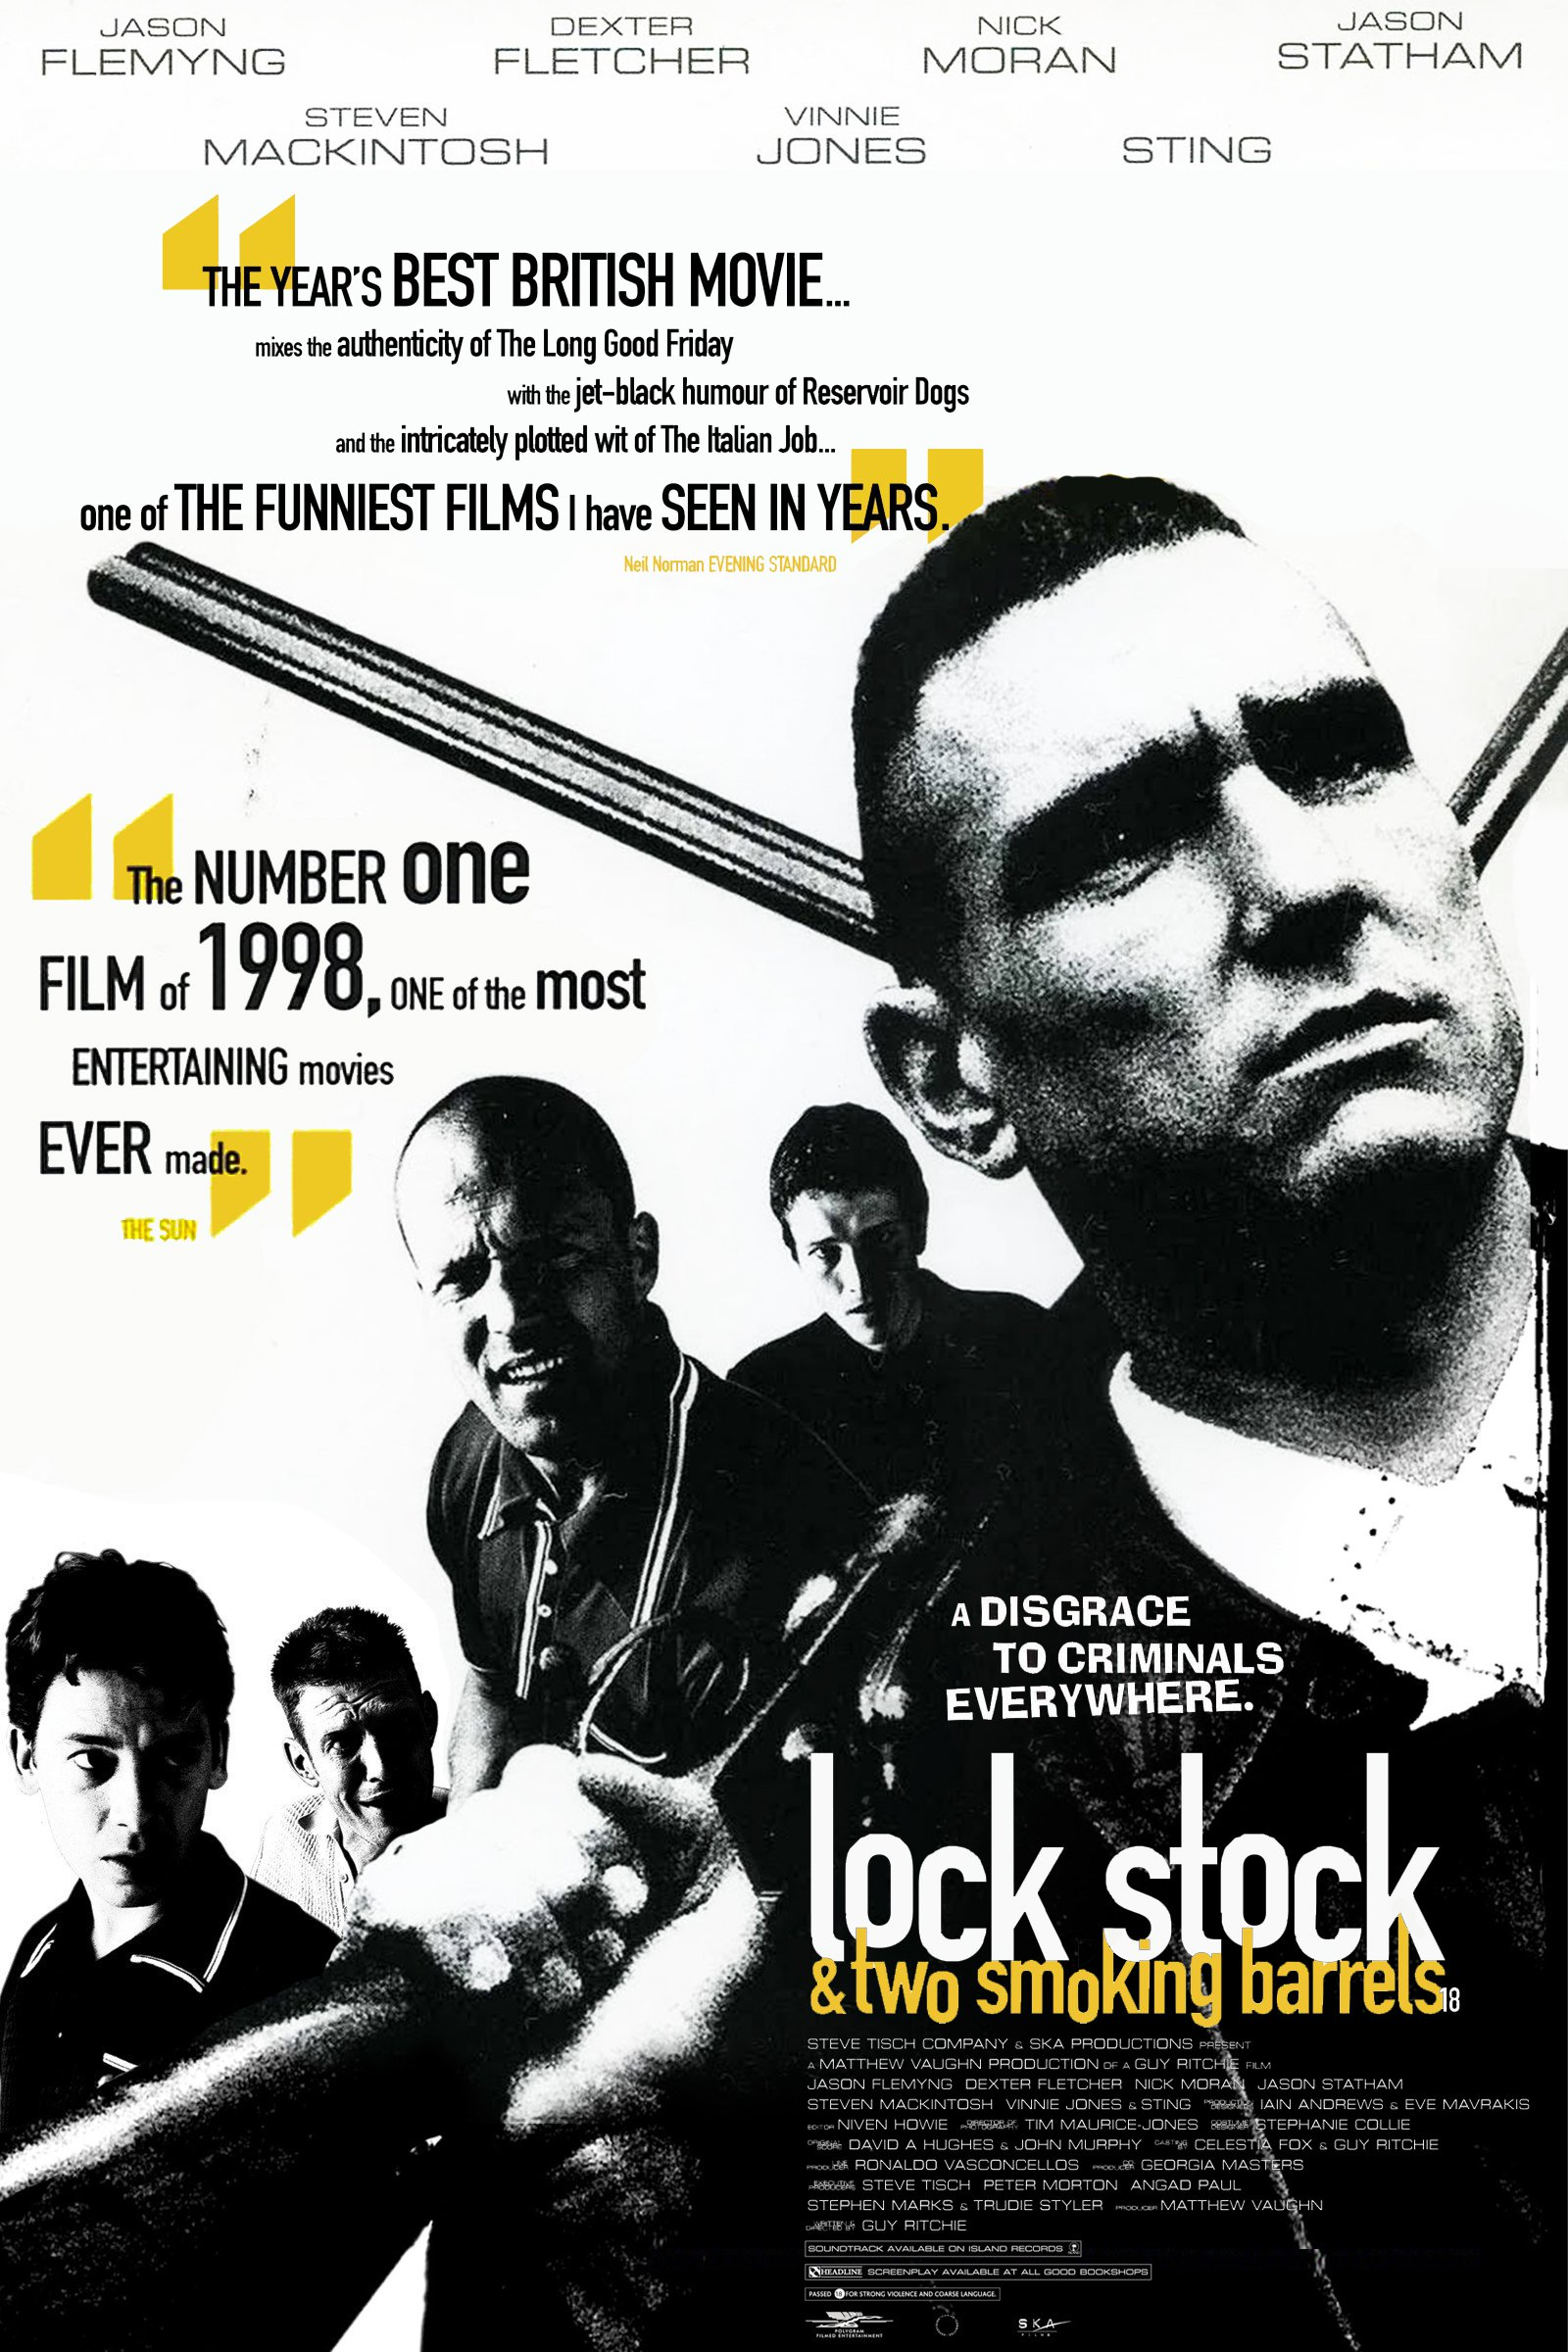

In [9]:
Image(lock_stock_imdb_poster_path)

### TMDb Exploration

***Search for Movie by Name & Print Summary***

In [10]:
def getMoviesByString(title_text):
    search = tmdb.Search()
    response = search.movie(query=title_text)
    return search.results

In [11]:
def getMoviesByTMDBId(tmdb_id):
    movie = tmdb.Movies(tmdb_id)
    return movie.info()

In [12]:
def getMoviesByIMDBId(imdb_id):
    find = tmdb.Find(id=imdb_id)
    response = find.info(external_source="imdb_id")
    return response['movie_results']

In [13]:
getMoviesByString('lock two') # search to yield more than one result...for sake of understanding output

[{u'adult': False,
  u'backdrop_path': u'/kzeR7BA0htJ7BeI6QEUX3PVp39s.jpg',
  u'genre_ids': [35, 80],
  u'id': 100,
  u'original_language': u'en',
  u'original_title': u'Lock, Stock and Two Smoking Barrels',
  u'overview': u'A card sharp and his unwillingly-enlisted friends need to make a lot of cash quick after losing a sketchy poker match. To do this they decide to pull a heist on a small-time gang who happen to be operating out of the flat next door.',
  u'popularity': 1.84715,
  u'poster_path': u'/qV7QaSf7f7yC2lc985zfyOJIAIN.jpg',
  u'release_date': u'1998-03-05',
  u'title': u'Lock, Stock and Two Smoking Barrels',
  u'video': False,
  u'vote_average': 7.4,
  u'vote_count': 1398},
 {u'adult': False,
  u'backdrop_path': None,
  u'genre_ids': [10751],
  u'id': 324645,
  u'original_language': u'en',
  u'original_title': u'Four Winds Island Part Two The Lockwood Jewels',
  u'overview': u"Adventure serial about a school girl's search for lost jewels on a small Sicilian island.",
  u'pop

In [14]:
lock_stock_tmdb_id = 100
lock_stock_tmdb = getMoviesByTMDBId(lock_stock_tmdb_id)
lock_stock_tmdb

{u'adult': False,
 u'backdrop_path': u'/kzeR7BA0htJ7BeI6QEUX3PVp39s.jpg',
 u'belongs_to_collection': None,
 u'budget': 1350000,
 u'genres': [{u'id': 35, u'name': u'Comedy'}, {u'id': 80, u'name': u'Crime'}],
 u'homepage': u'http://www.universalstudiosentertainment.com/lock-stock-and-two-smoking-barrels/',
 u'id': 100,
 u'imdb_id': u'tt0120735',
 u'original_language': u'en',
 u'original_title': u'Lock, Stock and Two Smoking Barrels',
 u'overview': u'A card sharp and his unwillingly-enlisted friends need to make a lot of cash quick after losing a sketchy poker match. To do this they decide to pull a heist on a small-time gang who happen to be operating out of the flat next door.',
 u'popularity': 0.84715,
 u'poster_path': u'/qV7QaSf7f7yC2lc985zfyOJIAIN.jpg',
 u'production_companies': [{u'id': 146, u'name': u'Handmade Films Ltd.'},
  {u'id': 491, u'name': u'Summit Entertainment'},
  {u'id': 1382, u'name': u'PolyGram Filmed Entertainment'},
  {u'id': 13419, u'name': u'SKA Films'},
  {u'id':

In [15]:
getMoviesByIMDBId("tt"+lock_stock_imdb_id) # to demonstrate that we can pull TMDb info with IMDb id

[{u'adult': False,
  u'backdrop_path': u'/kzeR7BA0htJ7BeI6QEUX3PVp39s.jpg',
  u'genre_ids': [35, 80],
  u'id': 100,
  u'original_language': u'en',
  u'original_title': u'Lock, Stock and Two Smoking Barrels',
  u'overview': u'A card sharp and his unwillingly-enlisted friends need to make a lot of cash quick after losing a sketchy poker match. To do this they decide to pull a heist on a small-time gang who happen to be operating out of the flat next door.',
  u'popularity': 1.84715,
  u'poster_path': u'/qV7QaSf7f7yC2lc985zfyOJIAIN.jpg',
  u'release_date': u'1998-03-05',
  u'title': u'Lock, Stock and Two Smoking Barrels',
  u'video': False,
  u'vote_average': 7.4,
  u'vote_count': 1398}]

***Print Genres and Poster***

In [16]:
def getMoviePosterURL(movie):
    base_url = "https://image.tmdb.org/t/p/"
    file_size = "w500"
    poster_path = movie['poster_path']
    poster_url = base_url+file_size+poster_path
    return poster_url

In [17]:
def getMoviePoster(movie):
    return getMoviePosterByPath(movie['poster_path'], movie['title'])

In [18]:
lock_stock_tmdb['genres']

[{u'id': 35, u'name': u'Comedy'}, {u'id': 80, u'name': u'Crime'}]

In [19]:
lock_stock_tmdb_poster_path = getMoviePosterURL(lock_stock_tmdb)
print(lock_stock_tmdb_poster_path)

https://image.tmdb.org/t/p/w500/qV7QaSf7f7yC2lc985zfyOJIAIN.jpg


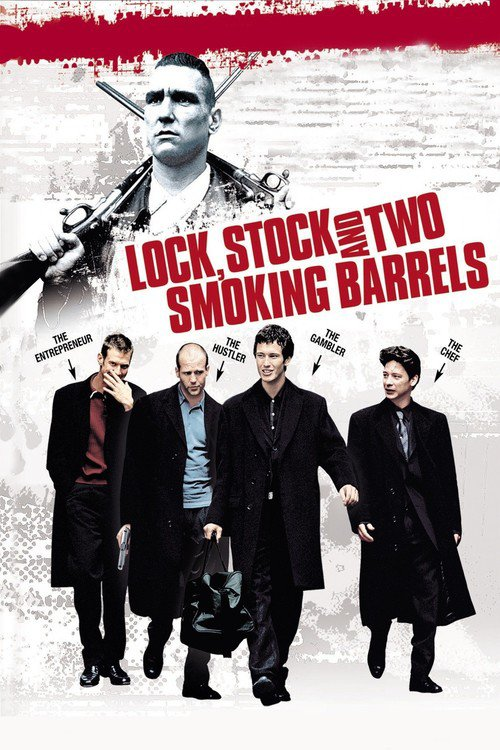

In [20]:
Image(lock_stock_tmdb_poster_path)

### Top 10 Movies in 2016 (By TMDb Popularity / User Score)

In [21]:
discover = tmdb.Discover()

# movies sorted by user votes...can be by TMDb's "popularity score" (sort_by='popularity.desc') or...
# ...TMDb's "average user score" (sort_by='vote_average.desc')
# exclude movies with less than specified number of votes
movies_2016 = discover.movie(primary_release_year=2016, sort_by='vote_average.desc', vote_count_gte=50)

In [22]:
movies_2016

{u'page': 1,
 u'results': [{u'adult': False,
   u'backdrop_path': u'/6vkhRvsRvWpmaRVyCXaxTkIEb7j.jpg',
   u'genre_ids': [16, 18, 14, 10749],
   u'id': 372058,
   u'original_language': u'ja',
   u'original_title': u'\u541b\u306e\u540d\u306f\u3002',
   u'overview': u'High schoolers Mitsuha and Taki are complete strangers living separate lives. But one night, they suddenly switch places. Mitsuha wakes up in Taki\u2019s body, and he in hers. This bizarre occurrence continues to happen randomly, and the two must adjust their lives around each other.',
   u'popularity': 6.706595,
   u'poster_path': u'/xq1Ugd62d23K2knRUx6xxuALTZB.jpg',
   u'release_date': u'2016-08-26',
   u'title': u'Your Name.',
   u'video': False,
   u'vote_average': 8.4,
   u'vote_count': 335},
  {u'adult': False,
   u'backdrop_path': u'/w1WqcS6hT0PUWC3adG37NSUOGX5.jpg',
   u'genre_ids': [10751, 16],
   u'id': 399106,
   u'original_language': u'en',
   u'original_title': u'Piper',
   u'overview': u'A mother bird tries to 

In [23]:
num_top_movies = 10  #note: only 20 movies fit on each results page

idx = range(0, num_top_movies)
cols = ['movie_id', 'title', 'vote_average', 'tmdb_popularity', 'genres']

tmdb_df = pd.DataFrame(index=idx, columns=cols)

In [24]:
for i in range(0, num_top_movies):
    tmdb_df['movie_id'][i] = movies_2016['results'][i]['id']
    tmdb_df['title'][i] = movies_2016['results'][i]['title']
    tmdb_df['vote_average'][i] = movies_2016['results'][i]['vote_average']
    tmdb_df['tmdb_popularity'][i] = movies_2016['results'][i]['popularity']
    tmdb_df['genres'][i] = movies_2016['results'][i]['genre_ids']

In [25]:
tmdb_df

,movie_id,title,vote_average,tmdb_popularity,genres
0,372058,Your Name.,8.4,6.7066,"[16, 18, 14, 10749]"
1,399106,Piper,8.2,3.32516,"[10751, 16]"
2,403450,In guerra per amore,8.1,1.33217,"[10752, 18, 35]"
3,369557,Sing Street,8.1,3.23565,"[10749, 18, 10402]"
4,393729,Divines,8,1.48536,[18]
5,393559,My Life as a Zucchini,8,2.43644,"[16, 18, 10751]"
6,347938,11.22.63,8,1.60847,"[18, 36, 53]"
7,407806,13th,7.9,1.29503,[99]
8,290098,The Handmaiden,7.9,2.92094,"[53, 18, 10749]"
9,371645,Hunt for the Wilderpeople,7.9,3.9824,"[18, 12, 35]"


### Analyze Genre Pairs

***Table of Genres with IDs***

In [26]:
num_genres = len(tmdb.Genres().list()['genres'])

idx = range(0, num_genres)
cols = ['genre_id', 'genre']

tmdb_genre_df = pd.DataFrame(index=idx, columns=cols)

In [28]:
for i in range(0, num_genres):
    tmdb_genre_df['genre_id'][i] = tmdb.Genres().list()['genres'][i].values()[0]
    tmdb_genre_df['genre'][i] = tmdb.Genres().list()['genres'][i].values()[1]

In [29]:
tmdb_genre_df

,genre_id,genre
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


***Create Table of 500 Movies with Genre Listings***

In [30]:
max_page = 25 #set to 25 since there are just over 500 entries with '2016' and 'vote_count'>=25 (20 entries per page!)
movies_per_page = 20 #always 20 entries per page

In [31]:
idx = range(0, max_page * movies_per_page)
cols = ['num_genres', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7']

movies_genres_table = pd.DataFrame(index=idx, columns=cols)

In [32]:
for i in range(0, max_page):
    movies_page = discover.movie(page=(i+1), primary_release_year=2016, vote_count_gte=25)
    
    for j in range(0, movies_per_page):
        genre_list = movies_page['results'][j]['genre_ids']
        row_num = i * movies_per_page + j
        movies_genres_table.loc[row_num][0] = len(genre_list)

        for k in range(0, len(genre_list)):
            movies_genres_table.loc[row_num][k+1] = genre_list[k]
            

In [33]:
movies_genres_table

,num_genres,id_1,id_2,id_3,id_4,id_5,id_6,id_7
0,5,16,35,18,10751,10402,NaN,NaN
1,3,12,28,14,NaN,NaN,NaN,NaN
2,4,12,16,35,10751,NaN,NaN,NaN
3,4,28,12,35,10749,NaN,NaN,NaN
4,4,28,18,878,10752,NaN,NaN,NaN
5,2,18,878,NaN,NaN,NaN,NaN,NaN
6,4,28,12,14,878,NaN,NaN,NaN
7,2,28,878,NaN,NaN,NaN,NaN,NaN
8,2,28,27,NaN,NaN,NaN,NaN,NaN
9,4,16,12,10751,35,NaN,NaN,NaN


***Create Table Showing How Genres Relate to Eachother***

In [34]:
idx = tmdb_genre_df['genre_id']
cols = tmdb_genre_df['genre_id']

genre_pairs_table = pd.DataFrame(index=idx, columns=cols)
genre_pairs_table = genre_pairs_table.fillna(0)

In [35]:
total_movies = len(movies_genres_table)

for row_num in range(0, total_movies):

    num_genres = movies_genres_table.iloc[row_num, 0]
    
    for i in range(0, num_genres):

        for j in range(0, num_genres):

            x = movies_genres_table.iloc[row_num, i+1]
            y = movies_genres_table.iloc[row_num, j+1]
            genre_pairs_table.loc[x, y] = genre_pairs_table.loc[x, y] + 1
        

In [36]:
genre_pairs_table

genre_id,28,12,16,35,80,99,18,10751,14,36,27,10402,9648,10749,878,10770,53,10752,37
genre_id,,,,,,,,,,,,,,,,,,,
28,102,27,9,23,15,0,30,4,14,4,12,0,4,3,30,1,32,6,4
12,27,60,14,21,2,0,18,15,20,2,2,0,2,6,15,1,8,0,2
16,9,14,31,18,1,1,6,20,5,0,0,1,0,1,3,1,0,0,0
35,23,21,18,174,5,1,52,19,9,2,10,9,4,26,7,3,9,3,0
80,15,2,1,5,41,1,23,0,1,0,4,0,6,0,2,0,29,0,2
99,0,0,1,1,1,23,0,0,0,1,0,3,0,0,0,0,0,1,0
18,30,18,6,52,23,0,226,6,10,20,11,7,13,36,12,1,52,11,3
10751,4,15,20,19,0,0,6,28,4,0,0,2,0,1,1,1,0,0,0
14,14,20,5,9,1,0,10,4,35,0,4,0,2,5,10,0,7,0,0


In [37]:
genre_pairs_table_names = genre_pairs_table

new_idx = tmdb_genre_df['genre']
new_cols = tmdb_genre_df['genre']

genre_pairs_table_names.columns = new_cols
genre_pairs_table_names = genre_pairs_table_names.set_index(new_idx)

In [38]:
genre_pairs_table_names

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
genre,,,,,,,,,,,,,,,,,,,
Action,102,27,9,23,15,0,30,4,14,4,12,0,4,3,30,1,32,6,4
Adventure,27,60,14,21,2,0,18,15,20,2,2,0,2,6,15,1,8,0,2
Animation,9,14,31,18,1,1,6,20,5,0,0,1,0,1,3,1,0,0,0
Comedy,23,21,18,174,5,1,52,19,9,2,10,9,4,26,7,3,9,3,0
Crime,15,2,1,5,41,1,23,0,1,0,4,0,6,0,2,0,29,0,2
Documentary,0,0,1,1,1,23,0,0,0,1,0,3,0,0,0,0,0,1,0
Drama,30,18,6,52,23,0,226,6,10,20,11,7,13,36,12,1,52,11,3
Family,4,15,20,19,0,0,6,28,4,0,0,2,0,1,1,1,0,0,0
Fantasy,14,20,5,9,1,0,10,4,35,0,4,0,2,5,10,0,7,0,0


*Observations:*

1. Of the 50 movies that listed "Romance" as a genre, 36 also listed "Drama" as a genre and just 1 listed "Horror" as a genre.
2. Of the 46 movies that listed "Science Fiction" as a genre, 30 also listed "Action" as a genre.
3. Movies categorized in the "Documentary" or "Horror" genres often do *not* list multiple genres, i.e. these genres are "pure".


***Total Number of Genre Listings for 500 Movies***

In [39]:
idx = tmdb_genre_df['genre']
cols = ['num_movies_with_genre']

genre_totals = pd.DataFrame(index=idx, columns=cols)

In [40]:
for i in range(0, len(genre_totals)):
    genre_totals.iloc[i,0] = genre_pairs_table_names.ix[tmdb_genre_df['genre'][i], tmdb_genre_df['genre'][i]]

In [41]:
genre_totals

,num_movies_with_genre
genre,
Action,102
Adventure,60
Animation,31
Comedy,174
Crime,41
Documentary,23
Drama,226
Family,28
Fantasy,35


***Check that Genre Totals Match***

In [42]:
sum(genre_totals.iloc[:, 0])

1105

In [43]:
sum(movies_genres_table.loc[:,'num_genres'])

1105

In [ ]:
def getMoviePosterByPath(poster_path, filename):
    base_url = "https://image.tmdb.org/t/p/"
    file_size = "w500"
    poster_uri = base_url+file_size+poster_path
    local_filname = filename + ".jpg"
    # Download and save file locally.
    urllib.urlretrieve(poster_uri, local_filname)
    return local_filname

In [ ]:
def loadGenres():
    return tmdb.Genres().list()

In [ ]:
print loadGenres()

In [ ]:
def getMoviesByGenreId(genre_id):
    return tmdb.Genres(id=genre_id).movies()

In [ ]:
print getMoviesByGenreId(28)

In [ ]:
movie = getMoviesByString("The Bourne Ult")
print "Genres for " + movie[0]['title'] + " include: " 
print movie[0]['genre_ids']
poster_local_filname = getMoviePosterByPath(movie[0]['poster_path'], movie[0]['title'])
Image(poster_local_filname)